# <center>Анализ данных и прогноз оттока клиентов фитнесс-клуба</center>

---
### Содержание:

-  [Цели дипломной работы](#task1) 
-  [Описание данных](#task2) 
-  [Необходимые для работы библиотеки](#task3) 
1.  [EDA | Исследовательский анализ данных](#task4)   
 1.1. [Подготовка данных](#task5)  
 1.2. [Оценка коррелирующих с оттоком параметров](#task6)  
 1.3. [Общий портрет клиента в разрезе оттока](#task7)  
 1.4. [Выводы и предложения](#task8)  
 
 
2. [Прогноз оттока клиентов](#task2-1)  
 2.1. [Модель логистической регрессии](#task2-2) 






---

### <a id = 'task1'> Цели дипломной работы:  
1. Построить модель прогноза оттока клиентов на основе характеризующих их данных.
2. Выявление групп клиентов с общими характеристиками. 
    
---

## <a id = 'task2'>Описание данных:

- '**Churn**' — факт оттока в текущем месяце   

### Данные клиента за предыдущий до проверки факта оттока месяц:  


- '**gender**' — пол  
- '**Near_Location**' — проживание или работа в районе, где находится фитнес-центр  
- '**Partner**' — сотрудник компании-партнёра клуба  
(сотрудничество с компаниями, чьи
сотрудники могут получать скидки на абонемент — в таком случае
фитнес-центр хранит информацию о работодателе клиента)  
- '**Promo_friends**' — факт первоначальной записи в рамках акции «приведи друга»  
(использовал промо-код от знакомого при оплате первого абонемента)  
- '**Phone**' — наличие контактного телефона  
- '**Age**' — возраст  
- '**Lifetime**' — время с момента первого обращения в фитнес-центр (в месяцах)  

### Информация на основе журнала посещений, покупок  и информация о текущем статусе абонемента клиента:  


- '**Contract_period**' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)  
- '**Month_to_end_contract**' — срок до окончания текущего действующего абонемента (в месяцах)  
- '**Group_visits**' — факт посещения групповых занятий  
- '**Avg_class_frequency_total**' — средняя частота посещений в неделю за все время с начала действия абонемента  
- '**Avg_class_frequency_current_month**' — средняя частота посещений в неделю за предыдущий месяц  
- '**Avg_additional_charges_total**' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон  
---

### <a id = 'task1'> Импортируем необходимые для работы библиотеки:

In [1]:
# Построение и обработка таблиц с данными
import pandas as pd

# Визуализация и построение графиков 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Статистические функции
import scipy.stats as stats 

# Фильтр незначительных предупреждений
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Модель прогноза
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Расчет точности - отношение совпадений к общему количеству позиций
from sklearn.metrics import accuracy_score

# Матрица ошибок результатов работы модели
from sklearn.metrics import confusion_matrix  

# Алгоритм классификации Random Forest
from sklearn.ensemble import RandomForestClassifier
# Выбор значимых параметров на основе 'случайного леса'
from sklearn.feature_selection import SelectFromModel

---
# <a id = 'task4'> 1. EDA | Исследовательский анализ данных

## <a id = 'task5'> 1.1. Подготовка данных
---

In [2]:
# Загружаем данные  

df = pd.read_csv('D:\\Netology\\Модуль 5. Python\\TOTAL_Analytics_fitness\\gym_dataset.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,13,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,2,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,2,3,1.113884,1.120078,0


In [3]:
# Проверяем наличие повторов записей

df.duplicated().value_counts()

False    4000
dtype: int64

In [4]:
# Смотрим на описание данных

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   int64  
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
# Выводим основную статистику

df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,5.011500,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,3.899573,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,2.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,2.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,7.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,13.000000,31.000000,6.023668,6.146783,1.000000


---
- Набор данных состоит из 4000 записей, состоящих из 14 параметров.  
- Повторов записей нет.
- Все данные имеют численное выражение (целые и дробные).  
- Значений, не соответствующих условиям диапазона для допустимых нет.  
- Исходя из известных диапазонов значений, по основной статистике можем сделать вывод об осутствии выбросов в значениях, кроме параметра 'Avg_additional_charges_total'.  
- Пропусков нет. На всякий случай проверяем:
---

In [6]:
# Считаем количество пропусков в каждом столбце

print(df.isnull().sum())

# % пропусков в каждом столбце
# (df.isnull().mean() * 100).round(2)

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


---
Стоит проверить наличие выбросов в значениях параметра 'Avg_additional_charges_total' (суммарная выручка от других услуг)  
Через межквартильный размах корректно искать выбросы в нормально распределенных данных  
Оцениваем нормальность распределения визуально:

---

In [7]:
stats.normaltest(df['Avg_additional_charges_total'])

NormaltestResult(statistic=217.1033594810358, pvalue=7.187940729972919e-48)

<AxesSubplot:xlabel='Avg_additional_charges_total', ylabel='Density'>

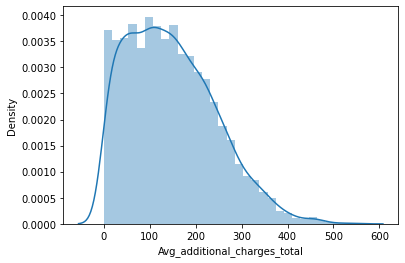

In [8]:
sns.distplot(df.Avg_additional_charges_total)

---
Видим распределение, похожее на нормальное, но 'односторонее'  
Выбросы возможны только со стороны upper_bound

---

In [9]:
# Проверяем наличие выбросов в столбце 'Avg_additional_charges_total'
# Допустинмые значения: >lower_bound и <upper_bound

q1 = df['Avg_additional_charges_total'].quantile(0.25)
q3 = df['Avg_additional_charges_total'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)

print('% выбросов по методу квантилей:',
    round(len(df[(
    (df['Avg_additional_charges_total'] < lower_bound) | 
    (df['Avg_additional_charges_total'] > upper_bound) 
)]) / len(df['Avg_additional_charges_total']) *100, 2)
)

% выбросов по методу квантилей: 0.73


<AxesSubplot:title={'center':'Выбросы по методу квантилей'}>

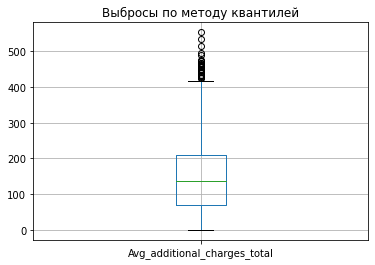

In [10]:
df['Avg_additional_charges_total'].plot(kind='box', title='Выбросы по методу квантилей', grid=True)

In [11]:
# Выводим эти выбросы:

df[(
    (df['Avg_additional_charges_total'] < lower_bound) | 
    (df['Avg_additional_charges_total'] > upper_bound) 
)]

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
5,1,1,0,0,1,1,1,34,450.743960,2,3,2.623477,2.637007,0
483,0,1,0,0,1,1,0,28,455.173225,2,5,2.092353,2.154556,0
761,0,1,0,0,1,1,1,27,472.318897,2,5,3.547490,3.755130,0
822,0,1,1,1,1,1,1,29,460.904008,2,10,3.157764,3.154869,0
862,1,1,0,0,1,1,0,34,445.954527,2,1,1.872359,1.892621,0
975,0,0,1,0,1,12,1,32,552.590740,12,1,0.887859,0.939304,0
999,0,1,1,1,1,12,1,28,457.406479,9,1,1.718064,1.655872,0
1400,1,1,0,0,1,6,1,31,462.178660,5,0,2.504586,2.453484,0
1597,0,0,0,0,1,6,0,31,471.720040,7,21,3.284087,3.294925,0
1756,1,1,0,0,1,1,1,30,456.861001,2,2,1.937277,2.011021,0


---
## <a id = 'task6'> 1.2. Оценка коррелирующих с оттоком параметров
---

In [12]:
# Оцениваем масштаб оттока в текущем месяце

data = df[['Churn']].value_counts()
data = data.to_frame().reset_index()
data = data.rename(columns = {0:'count'})
data['% charn'] = round(data['count'] / data['count'].sum() * 100, 0).astype('int')

data

,Churn,count,% charn
0,0,2939,73
1,1,1061,27


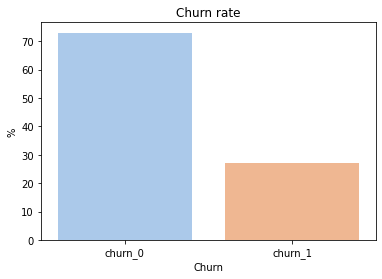

In [13]:
sns.barplot(x = ['churn_0', 'churn_1'], y='% charn', data=data, palette='pastel')
plt.title("Churn rate")
plt.xlabel('Churn')
plt.ylabel('%')

plt.show()

---
Отток клиентов сотавляет 27%  
Строим матрицу корреляций, чтобы найти наиболее влияющие на отток факторы

---

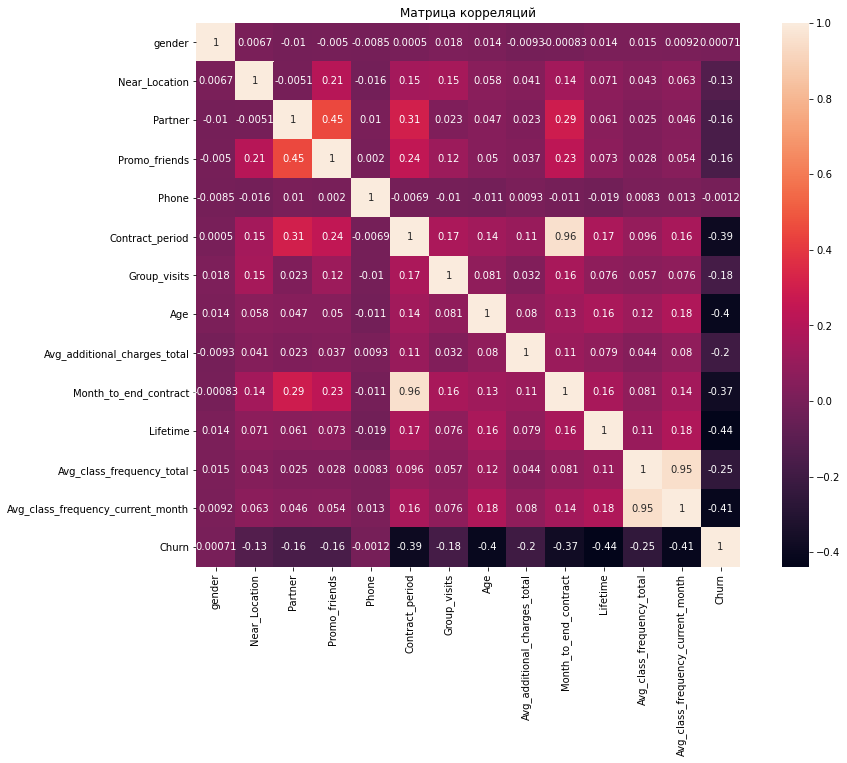

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(data = df.corr(), annot=True, square=True)
plt.title('Матрица корреляций')
plt.show()

---
Между собой параметры имеют довольно низкую корреляцию.  
Исключения составляют производные от себя параметры.

---

In [15]:
df.corr()[['Churn']].sort_values(by = 'Churn')
df_corr = df.corr()[['Churn']].sort_values(by = 'Churn')
df_corr = df_corr.drop(df_corr[df_corr.index == 'Churn'].index)
df_corr

,Churn
Lifetime,-0.438220
Avg_class_frequency_current_month,-0.412348
Age,-0.404735
Contract_period,-0.389984
Month_to_end_contract,-0.374307
Avg_class_frequency_total,-0.249715
Avg_additional_charges_total,-0.198697
Group_visits,-0.175325
Promo_friends,-0.162233
Partner,-0.157986


---
Наиболее сильная корреляция связана со сроком посещения, частотой посещений и возрастом клиентов.  
Можно выделить следующие характеристики, присущие потерянным клиентам:

- новые клиенты
- редко посесяющие клуб
- молодые клиенты
- с коротким абонементом

Следовательно, нужно направить усилия на мотивацию клентов чаще заниматься.   
Упор сделать на более молодых с коротким абонементом.

**Предложение:**  
- Провести опрос редко занимающихся клиентов с целью выявления причин такого поведения
- По результатам опроса рассмотреть возможность устранения выявленных причин.

---

## <a id = 'task7'> 1.3. Общий портрет клиента в разрезе оттока

---

Разделим параметры по типам имеющихся данных:
- Параметры с категориальными значениями
- Параметры с непрерывными значениями

---

### 1. Параметры с категориальными значениями
На основании срезов средних значений параметров с категориальными значениями сравниваем общие портреты оставшихся и уходящих клиентов:

---

In [16]:
cat_mean_compare = round(df[df['Churn'] == 0].mean(),2)[['Group_visits', 'Promo_friends', 'Partner', 'Near_Location', 'gender', 'Phone']]
cat_mean_compare = cat_mean_compare.to_frame()
cat_mean_compare = cat_mean_compare.rename(columns = {0:'churn_0_mean'})

cat_mean_compare['churn_1_mean'] = round(df[df['Churn'] == 1].mean(),2)
cat_mean_compare['%'] = (cat_mean_compare['churn_0_mean'] / cat_mean_compare['churn_1_mean']*100-100).astype(int)
cat_mean_compare = cat_mean_compare.sort_values(by='%', ascending=False)

cat_mean_compare = cat_mean_compare.drop(cat_mean_compare[cat_mean_compare.index == 'Churn'].index)
cat_mean_compare

,churn_0_mean,churn_1_mean,%
Promo_friends,0.35,0.18,94
Group_visits,0.46,0.27,70
Partner,0.53,0.36,47
Near_Location,0.87,0.77,12
gender,0.51,0.51,0
Phone,0.90,0.90,0


---
Оценим различия визуально:

---

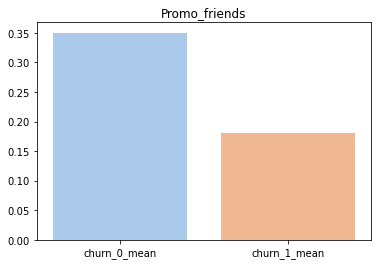

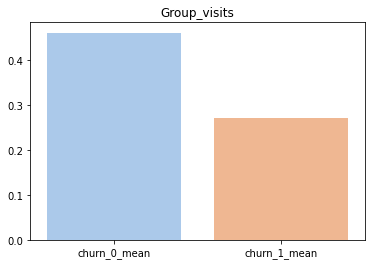

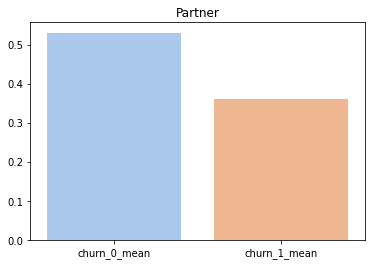

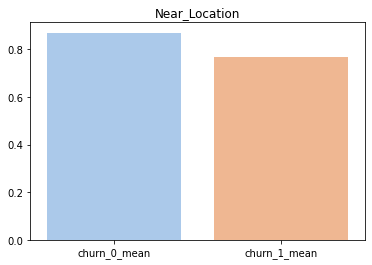

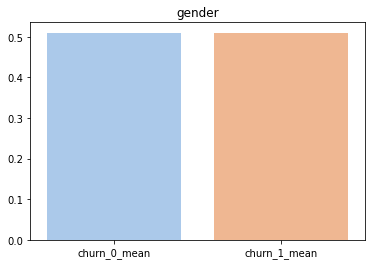

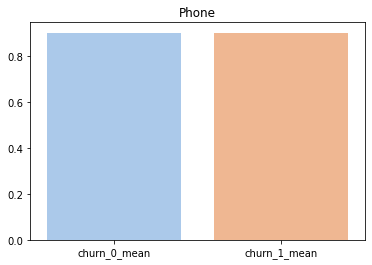

In [17]:
for a in range(len(cat_mean_compare)):
    sns.barplot(data = cat_mean_compare[['churn_0_mean', 'churn_1_mean']][a:a+1], palette='pastel')
    plt.title(cat_mean_compare[a:a+1].index[0])
    plt.show()
    print('')
    

---
### 2. Параметры с непрерывными значениями
На основании распределения значений параметров с непрерывными значениями сравниваем общие портреты оставшихся и уходящих клиентов:

---

In [18]:
cont_mean_compare = round(df[df['Churn'] == 0].mean(),2)[['Lifetime', 'Avg_class_frequency_current_month', 'Age', 'Contract_period', 'Month_to_end_contract', 'Avg_class_frequency_total', 'Avg_additional_charges_total']]
cont_mean_compare = cont_mean_compare.to_frame()
cont_mean_compare = cont_mean_compare.rename(columns = {0:'churn_0_mean'})

cont_mean_compare['churn_1_mean'] = round(df[df['Churn'] == 1].mean(),2)
cont_mean_compare['%'] = (cont_mean_compare['churn_0_mean'] / cont_mean_compare['churn_1_mean']*100-100).astype(int)
cont_mean_compare = cont_mean_compare.sort_values(by='%', ascending=False)

cont_mean_compare = cont_mean_compare.drop(cont_mean_compare[cont_mean_compare.index == 'Churn'].index)
cont_mean_compare

,churn_0_mean,churn_1_mean,%
Lifetime,4.71,0.99,375
Contract_period,5.75,1.73,232
Month_to_end_contract,5.89,2.58,128
Avg_class_frequency_current_month,2.03,1.04,95
Avg_class_frequency_total,2.02,1.47,37
Avg_additional_charges_total,158.45,115.08,37
Age,29.98,26.99,11


---
Оценим распределение значений визуально:

---

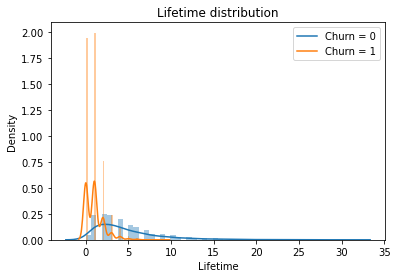

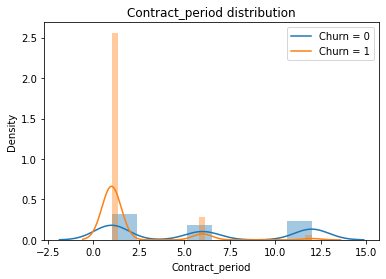

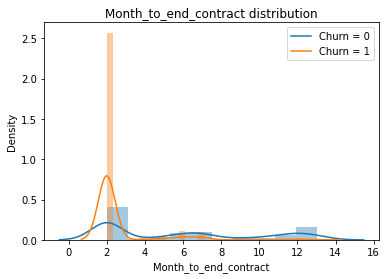

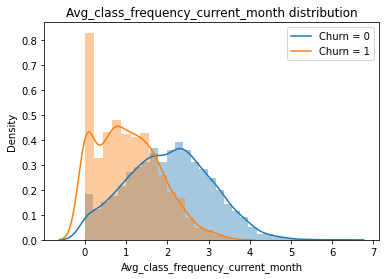

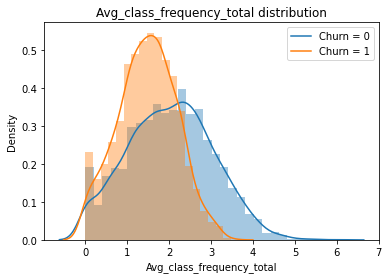

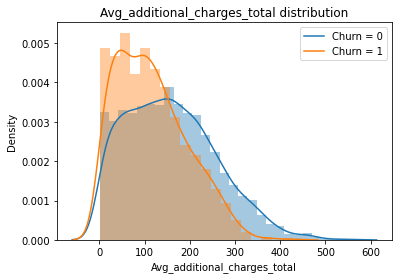

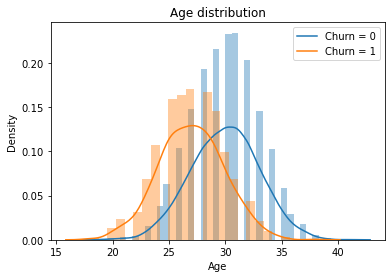

In [19]:
сontinuous_data_Churn_0 = df[df['Churn'] == 0] [['Lifetime', 'Contract_period', 'Month_to_end_contract', 'Avg_class_frequency_current_month', 'Avg_class_frequency_total', 'Avg_additional_charges_total', 'Age']]
сontinuous_data_Churn_0

сontinuous_data_Churn_1 = df[df['Churn'] == 1] [['Lifetime', 'Contract_period', 'Month_to_end_contract', 'Avg_class_frequency_current_month', 'Avg_class_frequency_total', 'Avg_additional_charges_total', 'Age']]
сontinuous_data_Churn_1

for a in сontinuous_data_Churn_0.columns:
    
    sns.distplot(сontinuous_data_Churn_0[a])
    sns.distplot(сontinuous_data_Churn_1[a])

    print('')
    plt.title(a+' distribution')
    plt.legend(['Churn = 0', 'Churn = 1'])
    plt.show()
    
    print('')

---
## <a id = 'task8'> 1.4. Выводы и предложения
    
Разделим параметры на группы по степени влияния на отток:
    
---

In [20]:
# Общий список параметров по степени влияния:

total_mean_compare = round(df[df['Churn'] == 0].mean(),2)
total_mean_compare = total_mean_compare.to_frame()
total_mean_compare = total_mean_compare.rename(columns = {0:'churn_0_mean'})

total_mean_compare['churn_1_mean'] = round(df[df['Churn'] == 1].mean(),2)
total_mean_compare['%'] = (total_mean_compare['churn_0_mean'] / total_mean_compare['churn_1_mean']*100-100).astype(int)
total_mean_compare = total_mean_compare.sort_values(by='%', ascending=False)

total_mean_compare = total_mean_compare.drop(total_mean_compare[total_mean_compare.index == 'Churn'].index)
total_mean_compare

,churn_0_mean,churn_1_mean,%
Lifetime,4.71,0.99,375
Contract_period,5.75,1.73,232
Month_to_end_contract,5.89,2.58,128
Avg_class_frequency_current_month,2.03,1.04,95
Promo_friends,0.35,0.18,94
Group_visits,0.46,0.27,70
Partner,0.53,0.36,47
Avg_additional_charges_total,158.45,115.08,37
Avg_class_frequency_total,2.02,1.47,37
Near_Location,0.87,0.77,12


---

**1.** Выделяем параметры с наиболее сильным влиянием на отток:
- Avg_class_frequency_current_month
- Promo_friends
- Group_visits	
- Partner	
- Avg_additional_charges_total	

**2.** Параметры с низким влиянием на отток:
- Near_Location
- Age	

**3.** Параметры, практически не влияющие на отток:
- gender
- Phone

**4.** Параметры, которые можно считать скорее следствием лояльности клиентов:
- Lifetime
- Contract_period
- Month_to_end_contract


---
### Не влияющие на отток параметры:

Оценим влияние **пола** клиента и **наличия телефона** в базе клуба статистически:  
(gender, Phone)

---

In [21]:
t, p_value = stats.ttest_ind(df[df['Churn'] == 0]['gender'], df[df['Churn'] == 1]['gender'])  # Критерий Стьюдента (t-test)
t, p_value

(-0.04474984696315838, 0.9643089361902392)

In [22]:
t, p_value = stats.ttest_ind(df[df['Churn'] == 0]['Phone'], df[df['Churn'] == 1]['Phone'])  # Критерий Стьюдента (t-test)
t, p_value

(0.07439624953956464, 0.9406988149138941)

---
Видим крайне низкое влияние на уровне значимости 94%.  
Подтверждаем гипотезу о незначительности данных факторов.

---


### Параметры с низким влиянием на отток:  

1. Влияние **удаленности** клиента от клуба логически обосновано.   
(Near_Location) 

Предложение:  
Ввести коэффициент на скидку, привязанный к удаленности клиента от клуба.  

2. Влияние **возраста**, возможно, связано со стремлением более молодых к новому.  
 (Age)

Возможно, динамика покажет стабильный приток клиентов этого возраста, компенсирующий отток.  

Предложение:  
Держать руку на пульсе тенденций и перенимать опыт конкурентов.  

---
### Параметры с наиболее сильным влиянием на отток:


1. **Активность клиентов клуба:**  
    (Avg_class_frequency_current_month)

Редко занимающиеся клиенты чаще прекращают занятия совсем.

Предложение:  
Провести опрос редко занимающихся клиентов с целью выявления причин такого поведения  
По результатам опроса рассмотреть возможность устранения выявленных причин.  
    

2. **Дополнительные услуги:**  
   (Group_visits, Avg_additional_charges_total)  

Видим, что уходящие клиенты гораздо реже посещали групповые занятия и меньше тратили на доп услуги  
Возможно, ушедшие клиенты не успели оценить все услуги клуба до принятия решения о продлении абонемента.

Предложение:  
Предоставить скидку на доп услуги тем, кто ими не пользуется (или давно не пользовался)  
Предложить записаться на пробные групповые занятия.

3. **Маркетинг и привлечение клиентов:**  
   (Partner, Promo_friends)  

Вывод: Программы работают и дают результат.
   


---

# <a id = 'task2-1'> 2. Прогноз оттока клиентов

## <a id = 'task2-2'> 2.1. Модель логистической регрессии | Logistic Regression

---

In [23]:
df.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [135]:
# Разделяем выборку на независимые и зависимую переменные:

X = df[['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month']]

Y = df['Churn']

In [136]:
# Разделяем полученые выборки на тренировочные и тестовые

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [83]:
# Создаем модель логистической регрессии

model = LogisticRegression()

# Загружаем в модель данные для тренировки

model.fit(X_train, Y_train)


C:\Users\graffite\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
# Загружаем в модель тестовые данные и записываем результат

Y_pred = model.predict(X_test)      

In [75]:
# Сравниваем результат теста с фактическими данными

result = X_test.copy()
result['Y_pred'] = Y_pred
result['Y_test'] = Y_test
result[['Y_pred', 'Y_test']].head()

,Y_pred,Y_test
555,0,0
3491,0,0
527,1,0
3925,0,0
2989,0,0


In [76]:
# Используем функцию 'расчет точности' - отношение верных прогнозов к общему количеству позиций

print(f"Точность предсказания: {int(accuracy_score(result['Y_pred'], result['Y_test'])*100)}%")

Точность предсказания: 92%


In [30]:
# Строим матрицу ошибок результатов работы модели

print('Матрица ошибок: \n', confusion_matrix(Y_test, Y_pred))
print('')
print('Верно предсказано Churn_0: ', confusion_matrix(Y_test, Y_pred)[0][0])
print('Верно предсказано Churn_1: ', confusion_matrix(Y_test, Y_pred)[1][1])
print('')
print('Ошибок предсказаний Churn_0: ', confusion_matrix(Y_test, Y_pred)[1][0])
print('Ошибок предсказаний Churn_1: ', confusion_matrix(Y_test, Y_pred)[0][1])

Матрица ошибок: 
 [[723  24]
 [ 48 205]]

Верно предсказано Churn_0:  723
Верно предсказано Churn_1:  205

Ошибок предсказаний Churn_0:  48
Ошибок предсказаний Churn_1:  24


---
## <a id = 'task2-3'> 2.2. Модель случайного леса | Random Forest

---
#### 1. Отбор признаков с использованием модели случайного леса (Random Forest)  

    Воспользуемся методом случайного леса (Random Forest), чтобы определить, насколько важен признак, 
    рассчитав степень уменьшения «шумов» за счёт этого признака.

---

In [137]:
# Создаем и обучаем модель

rf_model = RandomForestClassifier()
rf_model.fit(X, Y)

# Выведем степень значения признаков

param_value = X.columns.to_frame().reset_index()
param_value[0] = list(rf_model.feature_importances_)
param_value = param_value.rename(columns = {0:'importance', 'index':'parameter'})
param_value= param_value.sort_values(by='importance', ascending = False)
param_value

,parameter,importance
10,Lifetime,0.275337
12,Avg_class_frequency_current_month,0.170863
11,Avg_class_frequency_total,0.133931
7,Age,0.129598
8,Avg_additional_charges_total,0.083949
9,Month_to_end_contract,0.075816
5,Contract_period,0.065670
6,Group_visits,0.015850
0,gender,0.011690
2,Partner,0.010729


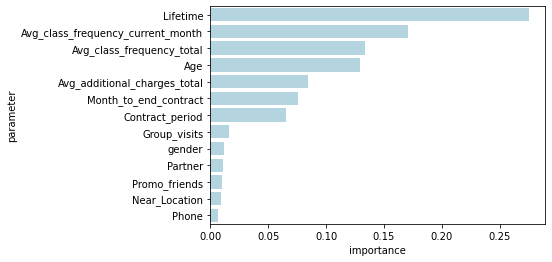

In [142]:
# Оценим степень значения визуально

sns.barplot(x="importance", y='parameter', data=param_value, color='lightblue')
plt.xticks(rotation=0)
plt.show()

In [138]:
# Посчитаем минимальное количество наиболее значимых признаков для получения максимального результата

sel = SelectFromModel(RandomForestClassifier(n_estimators = 1000))
sel.fit(X_train, Y_train)

selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

5

In [105]:
# Какие это признаки

for a in selected_feat:
    print(a)

Age
Avg_additional_charges_total
Lifetime
Avg_class_frequency_total
Avg_class_frequency_current_month


---
#### 2. Построение модели прогноза случайного леса (Random Forest)  

---

In [139]:
# Обучаем модель на тестовых данных

rf_model.fit(X_train, Y_train)

# Загружаем в модель тестовые данные и записываем результат

Y_pred_rf = rf_model.predict(X_test)

In [140]:
# Сравниваем результат теста с фактическими данными

result = X_test.copy()
result['Y_pred'] = Y_pred_rf
result['Y_test'] = Y_test
result[['Y_pred', 'Y_test']].head()

,Y_pred,Y_test
555,0,0
3491,0,0
527,0,0
3925,0,0
2989,0,0


In [141]:
# Используем функцию 'расчет точности' - отношение верных прогнозов к общему количеству позиций

print(f"Точность предсказания: {int(accuracy_score(result['Y_pred'], result['Y_test'])*100)}%")

Точность предсказания: 91%


In [122]:
# Строим матрицу ошибок результатов работы модели

print('Матрица ошибок: \n', confusion_matrix(Y_test, Y_pred_rf))
print('')
print('Верно предсказано Churn_0: ', confusion_matrix(Y_test, Y_pred_rf)[0][0])
print('Верно предсказано Churn_1: ', confusion_matrix(Y_test, Y_pred_rf)[1][1])
print('')
print('Ошибок предсказаний Churn_0: ', confusion_matrix(Y_test, Y_pred_rf)[1][0])
print('Ошибок предсказаний Churn_1: ', confusion_matrix(Y_test, Y_pred_rf)[0][1])

Матрица ошибок: 
 [[712  35]
 [ 51 202]]

Верно предсказано Churn_0:  712
Верно предсказано Churn_1:  202

Ошибок предсказаний Churn_0:  51
Ошибок предсказаний Churn_1:  35
